In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Path to the main directory containing all subdirectories with images
path_to_main_directory = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"

images = []
for subdirectory in os.listdir(path_to_main_directory):
    # Construct the path to the subdirectory
    subdirectory_path = os.path.join(path_to_main_directory, subdirectory)

    # Iterate over all files in the subdirectory and add images to the list
    for filename in os.listdir(subdirectory_path):
        img_path = os.path.join(subdirectory_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

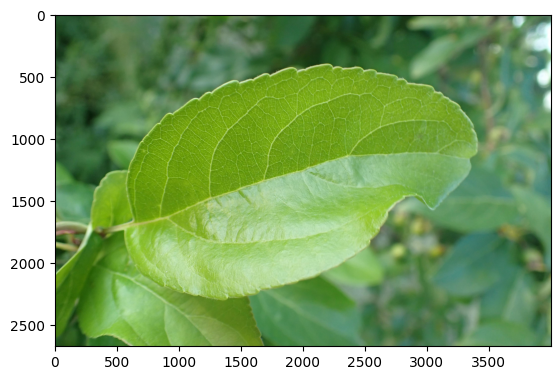

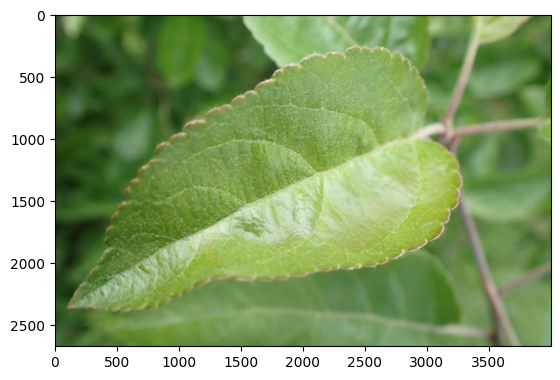

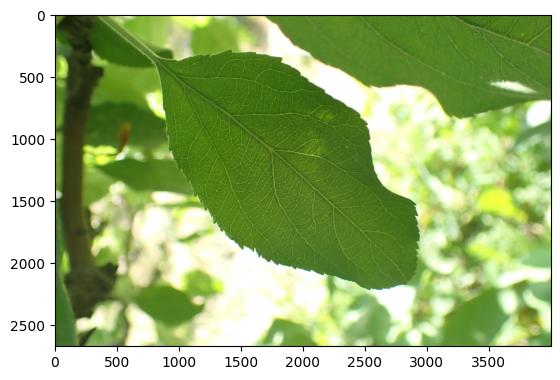

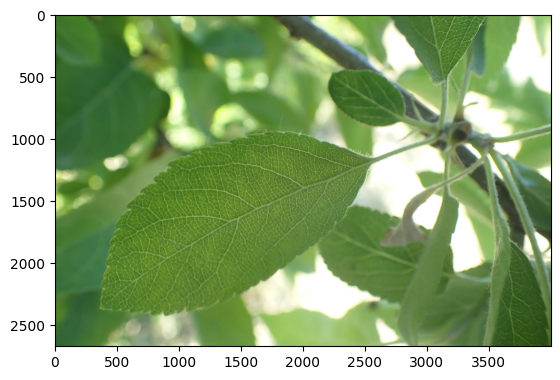

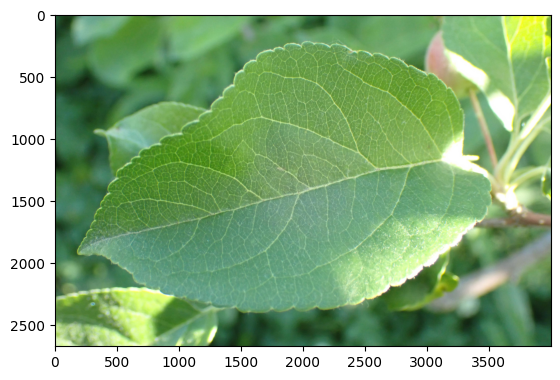

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
import os

path_to_folder = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"
subdirectories = [f.path for f in os.scandir(path_to_folder) if f.is_dir()]

print(len(subdirectories))

3


In [ ]:
import os

root_path = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"
num_images = 0

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 0 images in directory: /content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/
Found 35 images in directory: /content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/Healthy
Found 19 images in directory: /content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/Powdery
Found 175 images in directory: /content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/Rust


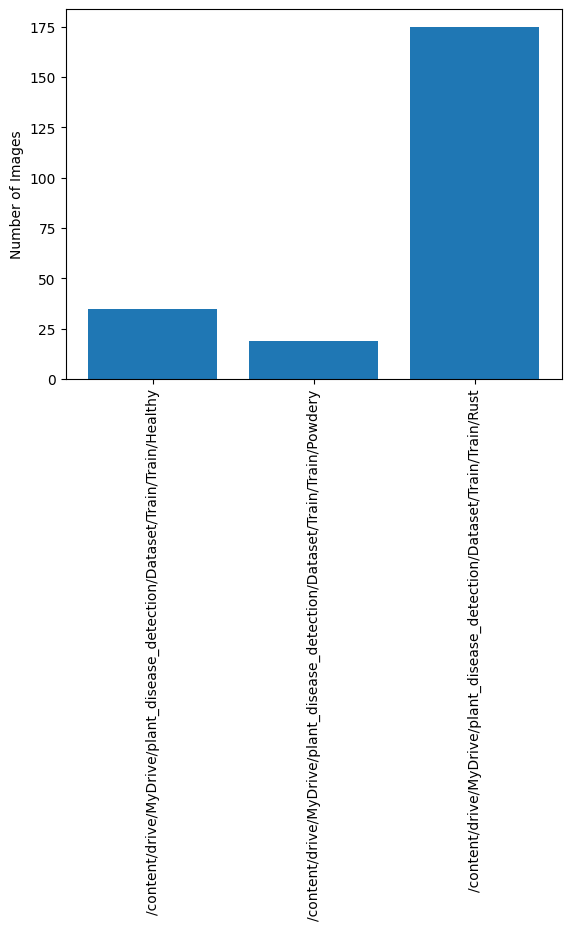

In [ ]:
import matplotlib.pyplot as plt

subdirectories = [os.path.join(root_path, d) for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]

# Count the number of images in each subdirectory
counts = [0] * len(subdirectories)
for i, directory in enumerate(subdirectories):
    counts[i] = len(os.listdir(directory))

# Create a bar chart to visualize the distribution
plt.bar(subdirectories, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

In [ ]:
import os
import cv2
import numpy as np

root_path = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

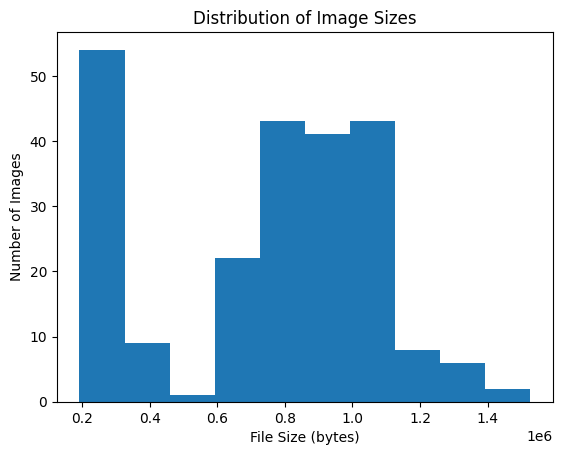

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
import plotly.express as px
import os

# Root directory path
root_path = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"

# List to store file sizes
sizes = []

# Iterate over each file in the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)

# Create a histogram figure with plotly
fig = px.histogram(x=sizes, nbins=50, title="Distribution of Image Sizes")

# Customize the plot
fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)

# Show the plot
fig.show()

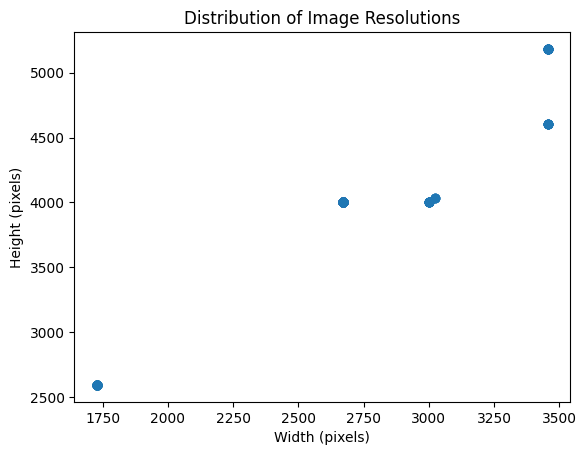

In [ ]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [ ]:
import plotly.express as px

# Create a scatter plot figure with plotly
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

# Customize the plot
fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Create a dataframe with the resolutions
df = pd.DataFrame(resolutions, columns=['width', 'height'])

# Create a 3D scatter plot with plotly
fig = px.scatter_3d(df, x='width', y='height', z=df.index,
                    title='Distribution of Image Resolutions',
                    labels={'width': 'Width (pixels)',
                            'height': 'Height (pixels)',
                            'index': 'Image Index'},
                    color=df.index)

# Customize the plot
fig.update_traces(marker=dict(size=2, line=dict(width=0.5)))

# Show the plot
fig.show()

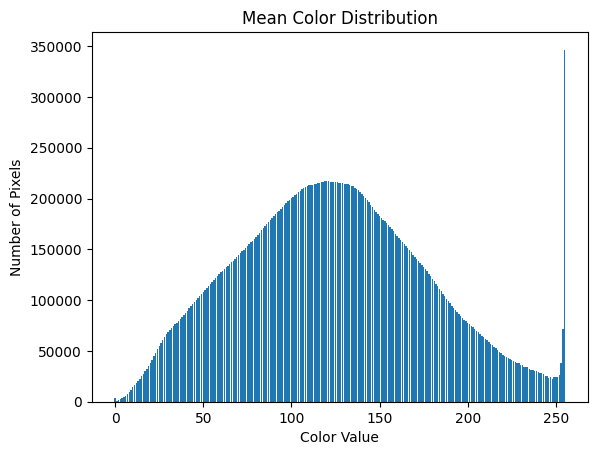

In [ ]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

In [ ]:
import plotly.graph_objects as go

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Create a bar chart of the mean color distribution
fig = go.Figure(
    go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
)

# Set the title and axis labels
fig.update_layout(
    title="Mean Color Distribution",
    xaxis_title="Color Value",
    yaxis_title="Number of Pixels"
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objs as go

# Create a list of bar traces for each color value
traces = []
for i in range(256):
    traces.append(go.Bar(x=np.arange(len(color_distributions)), y=color_distributions[:, i], name=str(i)))

# Create the figure and set the layout
fig = go.Figure(data=traces)
fig.update_layout(title="Color Distributions for Each Image", xaxis_title="Image Index", yaxis_title="Number of Pixels", barmode="stack")
# Show the plot
fig.show()

Found 229 files belonging to 3 classes.
Using 161 files for training.
Found 229 files belonging to 3 classes.
Using 68 files for validation.
['Healthy', 'Powdery', 'Rust']


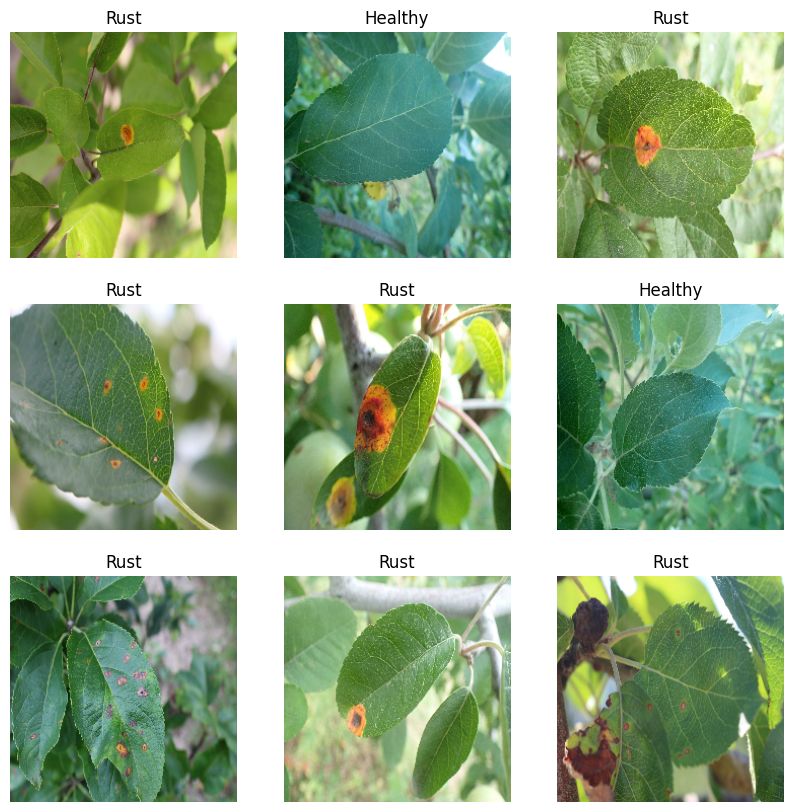

In [ ]:
import tensorflow as tf

# Set the path to the directory containing the images
data_dir = r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/"

# Define the batch size and image size
batch_size = 32
img_size = (224, 224)

# Use the `image_dataset_from_directory` function to create a dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3, # Split the data into training and validation sets
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

# Print the class names
class_names = train_ds.class_names
print(class_names)

# Visualize some of the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Create the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))  # Make sure class_names is defined
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(train_ds, epochs=20, validation_data=val_ds)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6621 - loss: 1.4310 - val_accuracy: 0.8676 - val_loss: 0.7624
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7323 - loss: 0.8379 - val_accuracy: 0.8676 - val_loss: 0.4898
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7328 - loss: 0.7178 - val_accuracy: 0.8676 - val_loss: 0.6794
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.7561 - loss: 0.7787 - val_accuracy: 0.8676 - val_loss: 0.5013
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7114 - loss: 0.7094 - val_accuracy: 0.8676 - val_loss: 0.4497
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7127 - loss: 0.6398 - val_accuracy: 0.8676 - val_loss: 0.3860
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.7746 - loss: 0.5367 - val_accuracy: 0.6471 - val_loss: 0.7089
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7850 - loss: 0.5042 - val_accuracy: 0.8676 - val_loss: 0.4128
Epoch 9/20
6/6 ━━━━

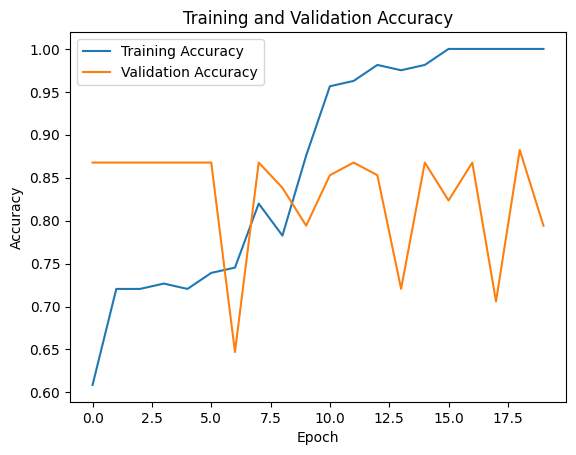

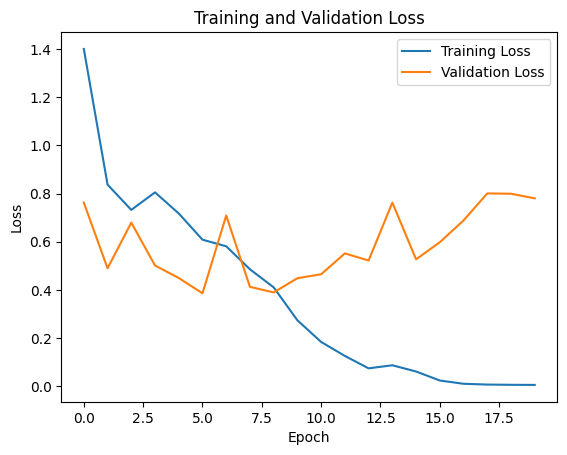

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plot the training and validation accuracy
fig1 = make_subplots()
fig1.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['accuracy'], name='Training Accuracy'))
fig1.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['val_accuracy'], name='Validation Accuracy'))
fig1.update_layout(title='Training and Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig1.show()

# Plot the training and validation loss
fig2 = make_subplots()
fig2.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['loss'], name='Training Loss'))
fig2.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['val_loss'], name='Validation Loss'))
fig2.update_layout(title='Training and Validation Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig2.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score

# Define transform to normalize the images
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the dataset and split into train and test sets
trainset = torchvision.datasets.ImageFolder(root=r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

valset = torchvision.datasets.ImageFolder(root=r"/content/drive/MyDrive/plant_disease_detection/Dataset/Train/Train/", transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 131)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the CNN
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the CNN
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished training")

# Evaluate the CNN on the validation set
net.eval()
total = 0
correct = 0
val_preds = []
val_labels = []
with torch.no_grad():
    for images, labels in valloader:
        # Make predictions
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        val_preds.extend(predicted.tolist())
        val_labels.extend(labels.tolist())
# Compute accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate precision, recall, and F1 score
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")
precision = precision_score(val_labels, val_preds, average='macro')
recall = recall_score(val_labels, val_preds, average='macro')
f1 = f1_score(val_labels, val_preds, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Finished training
Accuracy: 94.75982532751091%
Precision: 0.9273030255689215
Recall: 0.939047619047619
F1 score: 0.9329501915708813


In [ ]:
from PIL import Image
import numpy as np

# List of class names (Make sure this list corresponds to your model's classes)
class_names = ['RUST','Powdery','healthy']

# Load the image
img = Image.open(r"/content/drive/MyDrive/Dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg")

# Resize the image
img = img.resize((224, 224))

# Convert to numpy array and normalize
img_array = np.array(img)
img_tensor = img_array.astype('float32') / 255.0
img_tensor = np.expand_dims(img_tensor, axis=0)

# Predict using the model
prediction = model.predict(img_tensor)
predicted_class_idx = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_idx]

print("Predicted class label:", predicted_class_name)
print("Predicted class label:", predicted_class_idx)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class label: healthy
Predicted class label: 2
